In [1]:
# Lab 5 Logistic Regression Classifier
import tensorflow as tf
import numpy as np

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0' # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical CPU, 1 Logical CPU


In [3]:
# +Add data before loading

!wget -O gdrivedl 'https://f.mjh.nz/gdrivedl'
!ls -l
!pwd

"""
!bash /kaggle/working/gdrivedl https://drive.google.com/file/d/1eXaF7_hxbMDPaoTqF6l4GgH0SpGfq7QU/view?usp=sharing
!ls -l /kaggle/working
inputdir = "/kaggle/working"
"""

!bash /content/gdrivedl https://drive.google.com/file/d/1eXaF7_hxbMDPaoTqF6l4GgH0SpGfq7QU/view?usp=sharing
!ls -l /content
inputdir = "/content"

--2020-12-13 01:20:27--  https://f.mjh.nz/gdrivedl
Resolving f.mjh.nz (f.mjh.nz)... 104.28.30.233, 104.28.31.233, 172.67.162.157, ...
Connecting to f.mjh.nz (f.mjh.nz)|104.28.30.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1362 (1.3K) [application/octet-stream]
Saving to: ‘gdrivedl’

gdrivedl            100%[===================>]   1.33K  --.-KB/s    in 0s      

2020-12-13 01:20:27 (21.7 MB/s) - ‘gdrivedl’ saved [1362/1362]

total 8
-rw-r--r-- 1 root root 1362 Jan 29  2019 gdrivedl
drwxr-xr-x 1 root root 4096 Dec  2 22:04 sample_data
/content
File ID: 1eXaF7_hxbMDPaoTqF6l4GgH0SpGfq7QU
Downloading: https://docs.google.com/uc?export=download&id=1eXaF7_hxbMDPaoTqF6l4GgH0SpGfq7QU > .86.file
Moving: .86.file > data-03-diabetes.csv
Saved: data-03-diabetes.csv
DONE!
total 64
-rw-r--r-- 1 root root 53438 Dec 13 01:20 data-03-diabetes.csv
-rw-r--r-- 1 root root  1362 Jan 29  2019 gdrivedl
drwxr-xr-x 1 root root  4096 Dec  2 22:04 sample_data


In [4]:
xy = np.loadtxt(os.path.join(inputdir, 'data-03-diabetes.csv'), delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [5]:
print(x_data[:5])
print(y_data[:5])
print(x_data.shape, y_data.shape)

[[-0.294118    0.487437    0.180328   -0.292929    0.          0.00149028
  -0.53117    -0.0333333 ]
 [-0.882353   -0.145729    0.0819672  -0.414141    0.         -0.207153
  -0.766866   -0.666667  ]
 [-0.0588235   0.839196    0.0491803   0.          0.         -0.305514
  -0.492741   -0.633333  ]
 [-0.882353   -0.105528    0.0819672  -0.535354   -0.777778   -0.162444
  -0.923997    0.        ]
 [ 0.          0.376884   -0.344262   -0.292929   -0.602837    0.28465
   0.887276   -0.6       ]]
[[0.]
 [1.]
 [0.]
 [1.]
 [0.]]
(759, 8) (759, 1)


In [6]:
model = tf.keras.Sequential()

In [7]:
# multi-variable, x_data.shape[1] == feature counts == 8 in this case
model.add(tf.keras.layers.Dense(units=1, input_dim=x_data.shape[1], activation='sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.01),  metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(x_data, y_data, epochs=1000, verbose=0)

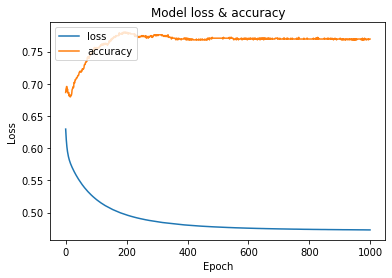

[0.7694334387779236, 0.7694334387779236, 0.7694334387779236, 0.7694334387779236, 0.7694334387779236]


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model loss & accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()
print(history.history['accuracy'][-5:])

In [12]:
# accuracy!
print("Accuracy: {0}".format(history.history['accuracy'][-1]))

Accuracy: 0.7694334387779236


In [13]:
model2 = tf.keras.Sequential()

In [14]:
# multi-variable, x_data.shape[1] == feature counts == 8 in this case
model2.add(tf.keras.layers.Dense(units=50, input_dim=x_data.shape[1], activation='relu'))
#model3.add(tf.keras.layers.Dropout(0.9))
model2.add(tf.keras.layers.Dense(units=40, activation='relu'))
model2.add(tf.keras.layers.Dense(units=30, activation='relu'))
model2.add(tf.keras.layers.Dense(units=20, activation='relu'))
model2.add(tf.keras.layers.Dense(units=10, activation='relu'))
model2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [15]:
model2.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.005),  metrics=['accuracy'])

In [16]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                450       
_________________________________________________________________
dense_2 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 4,561
Trainable params: 4,561
Non-trainable params: 0
____________________________________________________

In [17]:
history2 = model2.fit(x_data, y_data, epochs=3000, verbose=0)

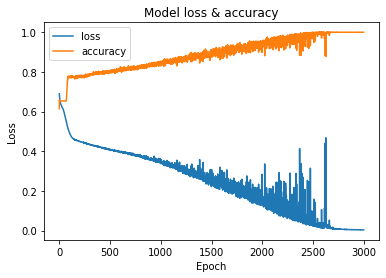

[1.0, 1.0, 1.0, 1.0, 1.0]


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history2.history['loss'])
plt.plot(history2.history['accuracy'])
plt.title('Model loss & accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()
print(history2.history['accuracy'][-5:])

In [19]:
model3 = tf.keras.Sequential()

In [20]:
# multi-variable, x_data.shape[1] == feature counts == 8 in this case
model3.add(tf.keras.layers.Dense(units=40, input_dim=x_data.shape[1], activation='relu'))
model3.add(tf.keras.layers.Dense(units=40, activation='relu'))
model3.add(tf.keras.layers.Dense(units=40, activation='relu'))
model3.add(tf.keras.layers.Dense(units=40, kernel_regularizer=tf.keras.regularizers.l2(0.001), activity_regularizer=tf.keras.regularizers.l2(0.01), activation='relu'))
model3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [21]:
model3.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.01),  metrics=['accuracy'])

In [22]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 40)                360       
_________________________________________________________________
dense_8 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_9 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_10 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 41        
Total params: 5,321
Trainable params: 5,321
Non-trainable params: 0
_________________________________________________________________


In [23]:
history3 = model3.fit(x_data, y_data, epochs=3000, verbose=0)

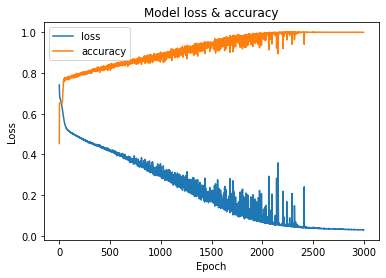

[1.0, 1.0, 1.0, 1.0, 1.0]


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history3.history['loss'])
plt.plot(history3.history['accuracy'])
plt.title('Model loss & accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()
print(history3.history['accuracy'][-5:])

In [25]:
# predict a single data point
y_predict = model.predict([[0.176471, 0.155779, 0, 0, 0, 0.052161, -0.952178, -0.733333]])

In [26]:
print("Predict: {0}".format(y_predict))

Predict: [[0.5926367]]


In [27]:
# evaluating model
evaluate = model.evaluate(x_data, y_data)

24/24 [==============================] - 0s 886us/step - loss: 0.4729 - accuracy: 0.7708


In [28]:
print("loss: {0}, accuracy: {1}".format(evaluate[0], evaluate[1]))

loss: 0.47290894389152527, accuracy: 0.7707509994506836
